#Excercise-2


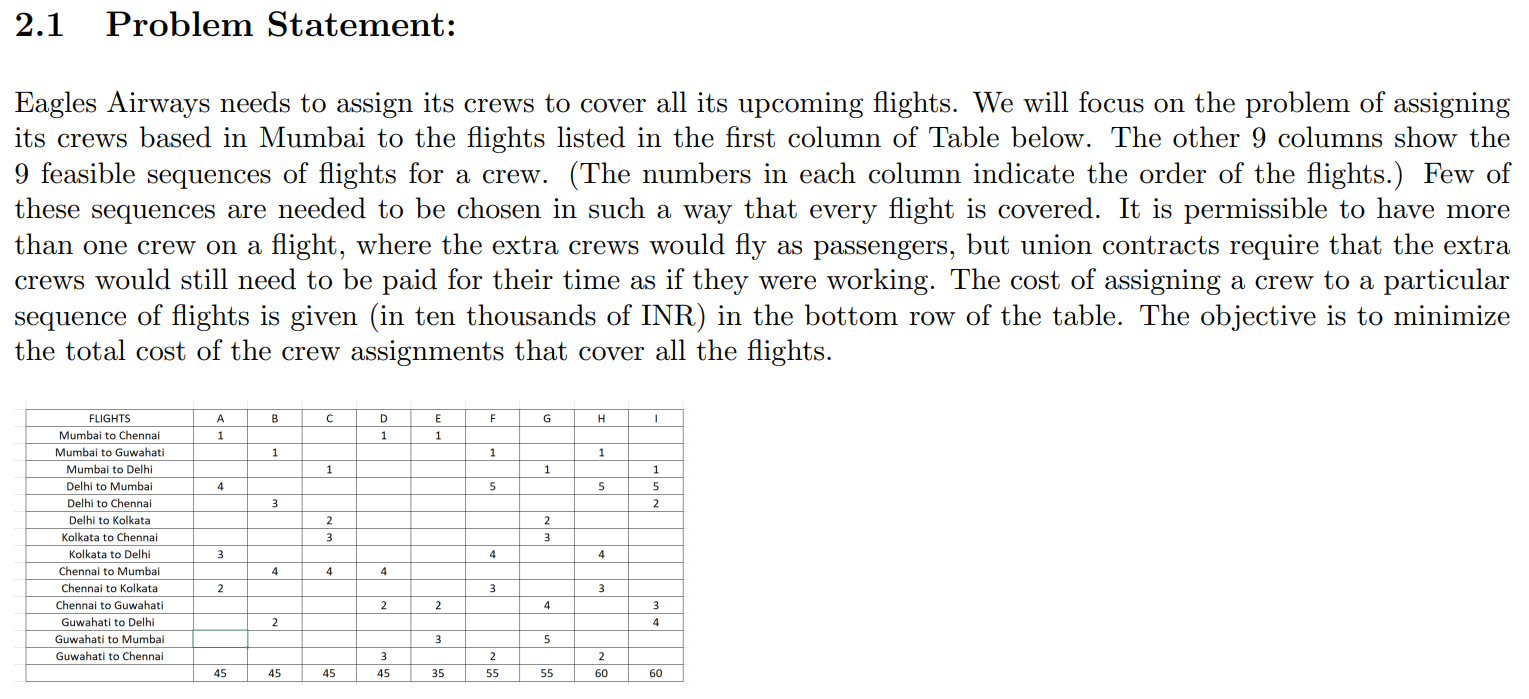




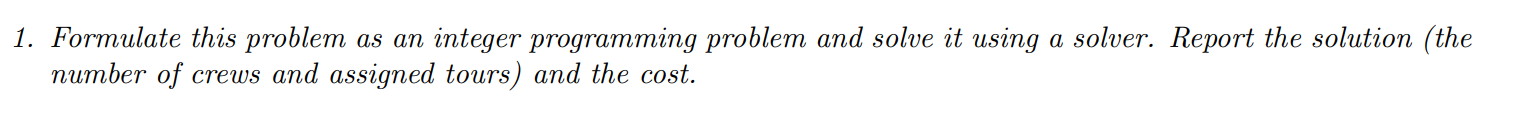

#Without Sequencing :

First of all defining decision variables as  crews (A,B..), We represent as numbers in i from 0 to 8, let our variable $y_i$ be:

$y_i \begin{cases}
1 & \text{if $i^{th}$ crew is choosen} \\
0 & \text{otherwise}
\end{cases}
$

Since, if we choose the crew $i$ then we can cover a flights mentioned in the sequence. Also let us assume the cost for each crew taken  as $c$ where $\textbf{c[i]}$ will represent the cost of taking crew $i$.


Now let us represent the flights taken by crews. I take variable $a_{ij}$ representing as 1 if flight $i$ is handled by crew $j$.

Let us represent a varible $a_{ij}$ as:
$a_{ij} \begin{cases} 1 & \text{flight i is covered by crew j} \\
0 & \text{otherwise} \end{cases}$

Then our integer program will become:

Objective: $$ \min \sum_{i=0}^{8}c_iy_i $$
Such that : we need to cover each flight atleast once, hence,

$$ \sum_{j = 0}^{8}a_{ij}y_j \geq 1 \ \ \ ∀ \ i = 0,1,2,...8$$

The objective is to choose as minimum crews as possible, such that for each flight i is covered atleast once. This is ensured as, for each flight $i$ atleast one crew is choosen.


In question it is not mention to consider any type of Sequence therefore for solving it we use without sequencing problem which has less number of constraints. as our b+objective is reduced the cost not to schedule the flights and crews so we have not worry about that if crew selescted then it will cover the flights for which their is order given .

In [73]:
!pip install -q pyomo

In [74]:
!apt-get install -y -qq glpk-utils

In [75]:
from pyomo.environ import*

In [76]:
import pandas as pd
import numpy as np


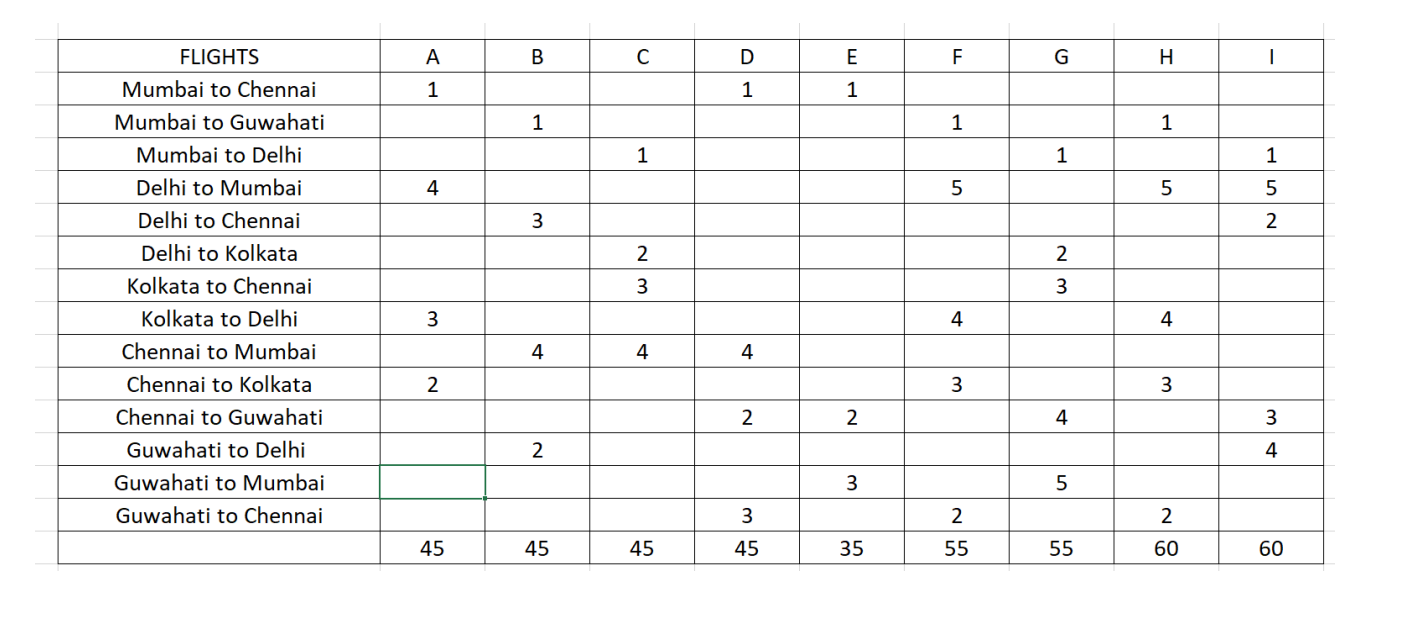

# Incidence Matrix Concept

The incidence matrix is a mathematical representation used in combinatorial optimization problems to describe the relationship between two sets of objects. In the context of crew assignment to flights, the incidence matrix helps in representing which flights are covered by each crew tour.

In our case, we have two sets of objects:

1. **Tours (or Crew Assignments):** Each row of the matrix represents a tour (or crew assignment).
2. **Flights:** Each column of the matrix represents a flight.

The incidence matrix is binary, where each entry indicates whether a particular flight is included in a specific tour. Here's how it works:

- If the entry `incidence_mat[i][j]` is 1, it means that flight `j` is included in tour `i`.
- If the entry `incidence_mat[i][j]` is 0, it means that flight `j` is not included in tour `i`.

By examining the rows of the incidence matrix, we can determine which flights are covered by each tour. This information is crucial for solving optimization problems where the objective is to assign crews to flights while minimizing costs or maximizing efficiency.

In summary, the incidence matrix provides a structured way to represent the relationship between tours and flights, making it easier to analyze and solve crew assignment problems.


In [77]:
A = [
    [1, 0, 0,1, 1, 0, 0,0, 0],
    [0, 1, 0,0,0, 1, 0, 1, 0],
    [0, 0, 1,0,0,0, 1,  0, 1],
    [1, 0, 0, 0,0, 1,0, 1, 1],
    [ 0, 1, 0,0,0,0, 0, 0, 1],
    [0, 0, 1, 0,0,0, 1, 0,0],
    [0,0, 1, 0, 0,0, 1, 0, 0],
    [1,0, 0, 0,0, 1, 0, 1,0],
    [0,1, 1, 1,0, 0, 0, 0, 0],
    [1,0,0,0, 0, 1, 0, 1, 0],
    [0, 0,0,1,1, 0, 1, 0, 1],
    [0,1, 0, 0, 0, 0,0, 0, 1],
    [0,0,0,0, 1,0, 1, 0,0],
    [0,0,0,1, 0,1, 0, 1, 0]
]

In [78]:
model = ConcreteModel()
model.y = Var(range(9), domain = Binary)
cost=[45,45,45,45,35,55,55,60,60]
model.objective = Objective(expr = sum(cost[i]*model.y[i] for i in range(9)), sense = minimize)

model.constraints = ConstraintList()

for i in range(14):
  model.constraints.add(expr = sum(A[i][j]*model.y[j] for j in range(9)) >= 1)

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)

In [79]:
model.pprint()

1 Var Declarations
    y : Size=9, Index={0, 1, 2, 3, 4, 5, 6, 7, 8}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :     1 : False : False : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   0.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary
          8 :     0 :   0.0 :     1 : False : False : Binary

1 Objective Declarations
    objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 45*y[0] + 45*y[1] + 45*y[2] + 45*y[3] + 35*y[4] + 55*y[5] + 55*y[6] + 60*y[7] + 60*y[8]

1 Constraint Declarations
    constraints : Size=14, Index={1, 2, 3, 4, 5, 6,

In [80]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()



# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 180.0
  Upper bound: 180.0
  Number of objectives: 1
  Number of constraints: 14
  Number of variables: 9
  Number of nonzeros: 39
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 3
      Number of created subproblems: 3
  Error rc: 0
  Time: 0.006931304931640625
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------

In [81]:
# display solution
print('Objective Value: ',model.objective())
print('\nDecision Variables')
for i in range(9):
  print(f'y{i} = { model.y[i]()}')

print('\nConstraints')
for i in range(1,15):
  print(f'Constraint {i} =  {model.constraints[i]()}')

Objective Value:  180.0

Decision Variables
y0 = 0.0
y1 = 1.0
y2 = 1.0
y3 = 0.0
y4 = 1.0
y5 = 1.0
y6 = 0.0
y7 = 0.0
y8 = 0.0

Constraints
Constraint 1 =  1.0
Constraint 2 =  2.0
Constraint 3 =  1.0
Constraint 4 =  1.0
Constraint 5 =  1.0
Constraint 6 =  1.0
Constraint 7 =  1.0
Constraint 8 =  1.0
Constraint 9 =  2.0
Constraint 10 =  1.0
Constraint 11 =  1.0
Constraint 12 =  1.0
Constraint 13 =  1.0
Constraint 14 =  1.0


In [82]:
# solution we get from ILP


Here Crew B,C,E,F are selected

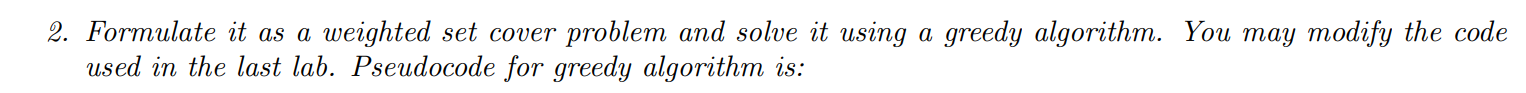

In [83]:
U=[i for i in range(14)]
U=set(U)
s1={0,3,7,9}#Crew-A
s2={1,4,8,11}#Crew-B
s3={2,5,6,8}#Crew-C
s4={0,8,10,13}#Crew-D
s5={0,10,12}#Crew-E
s6={1,3,7,9,13}#Crew-F
s7={2,5,6,10,12}#Crew-G
s8={1,3,7,9,13}#Crew-H
s9={2,3,4,10,11}#Crew-I
S=[s1,s2,s3,s4,s5,s6,s7,s8,s9]


The universal set in this context represents all the flights that need to be covered. From the given table, we can identify the following unique flights:

Mumbai to Chennai, Mumbai to Guwahati, Delhi to Mumbai, Delhi to Chennai, Delhi to Kolkata, Kolkata to Delhi, Chennai to Mumbai, Chennai to Kolkata, Chennai to Guwahati, Guwahati to Delhi.

Hence, the universal set consists of these flights:

=
{
Mumbai to Chennai
,
Mumbai to Guwahati
,
Delhi to Mumbai
,
Delhi to Chennai
,
Delhi to Kolkata
,
Kolkata to Delhi
,
Chennai to Mumbai
,
Chennai to Kolkata
,
Chennai to Guwahati
,
Guwahati to Delhi
}
U={Mumbai to Chennai,Mumbai to Guwahati,Delhi to Mumbai,Delhi to Chennai,Delhi to Kolkata,Kolkata to Delhi,Chennai to Mumbai,Chennai to Kolkata,Chennai to Guwahati,Guwahati to Delhi}

Now, let's define the subsets based on the given table. Each subset represents a crew's feasible sequences of flights. For example:

Subset 1: Crew's sequence of flights for Mumbai to Chennai, Delhi to Kolkata, and Kolkata to Delhi.
Subset 2: Crew's sequence of flights for Mumbai to Guwahati, Mumbai to Guwahati, and Chennai to Kolkata.
Subset 3: Crew's sequence of flights for Delhi to Mumbai, Delhi to Chennai, and Guwahati to Delhi.
... and so on.

Each subset is represented by the flights that the crew needs to cover. For example, Subset 1 consists of flights Mumbai to Chennai, Delhi to Kolkata, and Kolkata to Delhi, indicating that this crew needs to cover these flights.

The logic behind taking these subsets is to ensure that each crew's feasible sequences of flights are represented. This allows us to find the minimum cost combination of crews to cover all the flights efficiently. Each subset corresponds to a crew's possible sequence of flights, and our objective is to select the minimum number of crews that cover all the flights.

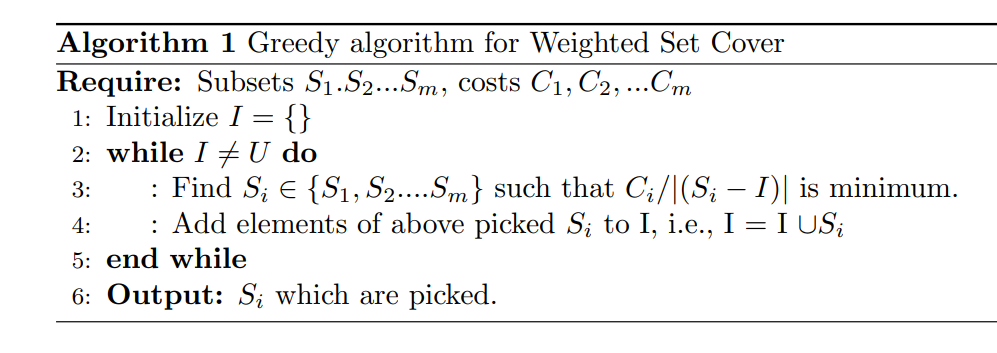

In [84]:
cost=[45,45,45,45,35,55,55,60,60]

In [85]:
import time

In [86]:

def greedy_set_cover(U, S, costs):
    start=time.time()
    index = []  # Initialize list to store indices of selected sets
    I = set()
    subset_used=[]
    total_cost = 0  # Initialize total cost
    set_to_select = []  # Initialize the I set
    while I != U:  # While I is not equal to the universal set
        cost_cover_ratio=[]
        for i in range(len(S)):
            remaining_elements = S[i]-I
            if len(remaining_elements)>0:
                ratio = costs[i] / len(remaining_elements)
                cost_cover_ratio.append((ratio,i))
        if not cost_cover_ratio:
            break
        min_ratio, min_ratio_index=min(cost_cover_ratio)
        I =I.union(S[min_ratio_index])
        set_to_select.append(S[min_ratio_index])
        subset_used.append(min_ratio_index)
        total_cost+=cost[min_ratio_index]
    return I,set_to_select,subset_used,total_cost
time_start=time.time()

Union_of_selected_set, selected_sets, index, total_cost = greedy_set_cover(U, S, cost)
end=time.time()
total_time=end-time_start
print("Selected sets:", selected_sets)
print("Indices of selected sets:", index)
print("Total cost:", total_cost)
print('total_time taken: ',total_time)


Selected sets: [{1, 3, 7, 9, 13}, {2, 5, 6, 10, 12}, {8, 1, 11, 4}, {0, 10, 12}]
Indices of selected sets: [5, 6, 1, 4]
Total cost: 190
total_time taken:  0.0019373893737792969


HERE CREW F,G,B,E ARE SELECTED

In [87]:
obj_ilp=180
obj_greedy=190
obj_ratio=obj_ilp/obj_greedy
time_ilp=0.0034456253051757812
time_greedy=0.00012731552124023438
time_ratio=time_ilp/time_greedy

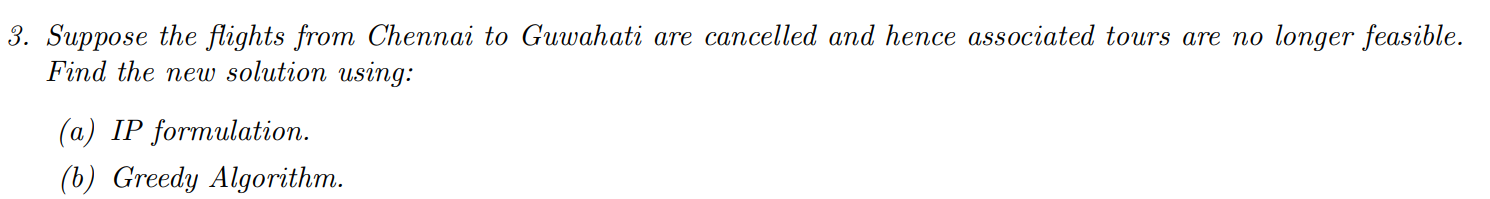

In [88]:
A = [
    [1, 0, 0,1, 1, 0, 0,0, 0],
    [0, 1, 0,0,0, 1, 0, 1, 0],
    [0, 0, 1,0,0,0, 1,  0, 1],
    [1, 0, 0, 0,0, 1,0, 1, 1],
    [ 0, 1, 0,0,0,0, 0, 0, 1],
    [0, 0, 1, 0,0,0, 1, 0,0],
    [0,0, 1, 0, 0,0, 1, 0, 0],
    [1,0, 0, 0,0, 1, 0, 1,0],
    [0,1, 1, 1,0, 0, 0, 0, 0],
    [1,0,0,0, 0, 1, 0, 1, 0],
   #chennai to guwahati flight is cancel
    [0,1, 0, 0, 0, 0,0, 0, 1],
    [0,0,0,0, 1,0, 1, 0,0],
    [0,0,0,1, 0,1, 0, 1, 0]
]

In [108]:
model1 = ConcreteModel()
model1.y = Var(range(9), domain = Binary)
cost=[45,45,45,45,35,55,55,60,60]
model1.objective = Objective(expr = sum(cost[i]*model1.y[i] for i in range(9)), sense = minimize)

model1.constraints = ConstraintList()

for i in range(13):
  model1.constraints.add(expr = sum(A[i][j]*model1.y[j] for j in range(9)) >= 1)

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model1)
model1.pprint()
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()


1 Var Declarations
    y : Size=9, Index={0, 1, 2, 3, 4, 5, 6, 7, 8}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :     1 : False : False : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   1.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   0.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary
          8 :     0 :   0.0 :     1 : False : False : Binary

1 Objective Declarations
    objective : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : 45*y[0] + 45*y[1] + 45*y[2] + 45*y[3] + 35*y[4] + 55*y[5] + 55*y[6] + 60*y[7] + 60*y[8]

1 Constraint Declarations
    constraints : Size=13, Index={1, 2, 3, 4, 5, 6,

In [110]:
# display solution
print('Objective Value: ',model1.objective())
print('\nDecision Variables')
for i in range(9):
  print(f'y{i} = { model1.y[i]()}')

print('\nConstraints')
for i in range(1,14):
  print(f'Constraint {i} =  {model1.constraints[i]()}')

Objective Value:  180.0

Decision Variables
y0 = 0.0
y1 = 1.0
y2 = 1.0
y3 = 0.0
y4 = 1.0
y5 = 1.0
y6 = 0.0
y7 = 0.0
y8 = 0.0

Constraints
Constraint 1 =  1.0
Constraint 2 =  2.0
Constraint 3 =  1.0
Constraint 4 =  1.0
Constraint 5 =  1.0
Constraint 6 =  1.0
Constraint 7 =  1.0
Constraint 8 =  1.0
Constraint 9 =  2.0
Constraint 10 =  1.0
Constraint 11 =  1.0
Constraint 12 =  1.0
Constraint 13 =  1.0


HERE CREW B,C,E,F ARE SELECTED

In [91]:
time_ilp2= 0.006600856781005859
obj_ilp2=180

In [104]:
U=[i for i in range(13)]
#removing 10th flight
U=set(U)
s1={0,3,7,9}
s2={1,4,8,10}
s3={2,5,6,8}
s4={0,8,12}
s5={0,11}
s6={1,3,7,9,12}
s7={2,5,6,11}
s8={1,3,7,9,12}
s9={2,3,4,10}
S=[s1,s2,s3,s4,s5,s6,s7,s8,s9]
U

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [106]:

def greedy_set_cover(U, S, costs):
    start=time.time()
    index = []  # Initialize list to store indices of selected sets
    I = set()
    subset_used=[]
    total_cost = 0  # Initialize total cost
    set_to_select = []  # Initialize the I set
    while I != U:  # While I is not equal to the universal set
        cost_cover_ratio=[]
        for i in range(len(S)):
            remaining_elements = S[i]-I
            if len(remaining_elements)>0:
                ratio = costs[i] / len(remaining_elements)
                cost_cover_ratio.append((ratio,i))
        if not cost_cover_ratio:
            break
        min_ratio, min_ratio_index=min(cost_cover_ratio)
        I =I.union(S[min_ratio_index])
        set_to_select.append(S[min_ratio_index])
        subset_used.append(min_ratio_index)
        total_cost+=cost[min_ratio_index]
    return I,set_to_select,subset_used,total_cost
time_start=time.time()

Union_of_selected_set, selected_sets, index, total_cost = greedy_set_cover(U, S, cost)
end=time.time()
total_time=end-time_start
print("Selected sets:", selected_sets)
print("Indices of selected sets:", index)
print("Total cost:", total_cost)
print('total_time taken: ',total_time)


Selected sets: [{1, 3, 7, 9, 12}, {8, 2, 5, 6}, {0, 11}, {8, 1, 10, 4}]
Indices of selected sets: [5, 2, 4, 1]
Total cost: 180
total_time taken:  0.00019788742065429688


here Crew - F,C,E,B ARE SELECTED

In [103]:
time_greedy2= 0.00019097328186035156

obj_greedy2=180

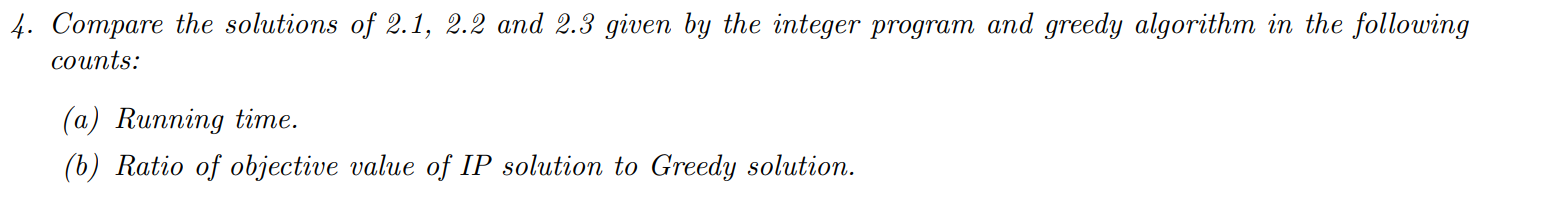

In [99]:
obj_ratio2=obj_ilp2/obj_greedy2


In [100]:
#Running time
print('Time Taken by ILP in Intial problem:',time_ilp)
print('Time Taken by greedy algorithm in Intial problem:',time_greedy)
print('______________________________________________________________________\n')
print('Time Taken by ILP in  problem after removing flight:',time_ilp2)
print('Time Taken by greedy algorithm in problem after removing flight:',time_greedy2)

Time Taken by ILP in Intial problem: 0.0034456253051757812
Time Taken by greedy algorithm in Intial problem: 0.00012731552124023438
______________________________________________________________________

Time Taken by ILP in  problem after removing flight: 0.006600856781005859
Time Taken by greedy algorithm in problem after removing flight: 0.00019097328186035156


In [101]:
#Objective Ratio
print("Objective ratio of ILP to greedy  in Intial problem:\n", obj_ratio)
print('______________________________________________________________________\n')
print("Objective ratio of ILP to greedy  in problem after removing one flight:\n", obj_ratio2)


Objective ratio of ILP to greedy  in Intial problem:
 0.9473684210526315
______________________________________________________________________

Objective ratio of ILP to greedy  in problem after removing one flight:
 1.0


TIme taken ratio varies as we run every time so it is not constant but approximately they are similar to previous ones.

Here we see that ratio of objective function changes as greedy algo gives better answer as compare to 1 because in 1 ilp gives 180  AND greeedy(2.2) gives 190 and in section 2.3 both greedy and ilp gives 180 so we see that greedy need not to be always correct.